In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Importing the data##

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving data.csv.zip to data.csv.zip


In [ ]:
import zipfile
import os

# Replace 'your_file.zip' with the actual name of your uploaded zip file
zip_file = 'data.csv.zip'

with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall('../content')  # 'unzipped_folder' is where files will be extracted



## Data preprocessing##

In [ ]:
import pandas as pd

data = pd.read_csv('/content/data.csv', encoding='latin1')


<ipython-input-5-4eb95678941a>:3: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/data.csv', encoding='latin1')


In [ ]:
data.head()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


In [ ]:
data.shape

(435742, 13)

In [ ]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   stn_code                     291665 non-null  object 
 1   sampling_date                435739 non-null  object 
 2   state                        435742 non-null  object 
 3   location                     435739 non-null  object 
 4   agency                       286261 non-null  object 
 5   type                         430349 non-null  object 
 6   so2                          401096 non-null  float64
 7   no2                          419509 non-null  float64
 8   rspm                         395520 non-null  float64
 9   spm                          198355 non-null  float64
 10  location_monitoring_station  408251 non-null  object 
 11  pm2_5                        9314 non-null    float64
 12  date                         435735 non-null  object 
dtyp

,so2,no2,rspm,spm,pm2_5
count,401096.000000,419509.000000,395520.000000,198355.000000,9314.000000
mean,10.829414,25.809623,108.832784,220.783480,40.791467
std,11.177187,18.503086,74.872430,151.395457,30.832525
min,0.000000,0.000000,0.000000,0.000000,3.000000
25%,5.000000,14.000000,56.000000,111.000000,24.000000
50%,8.000000,22.000000,90.000000,187.000000,32.000000
75%,13.700000,32.200000,142.000000,296.000000,46.000000
max,909.000000,876.000000,6307.033333,3380.000000,504.000000


###Making a copy of dataframe to clean the data and do further preprocesing

In [ ]:
df = data.copy()

In [ ]:
df.head()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


In [ ]:
df.columns

Index(['stn_code', 'sampling_date', 'state', 'location', 'agency', 'type',
       'so2', 'no2', 'rspm', 'spm', 'location_monitoring_station', 'pm2_5',
       'date'],
      dtype='object')

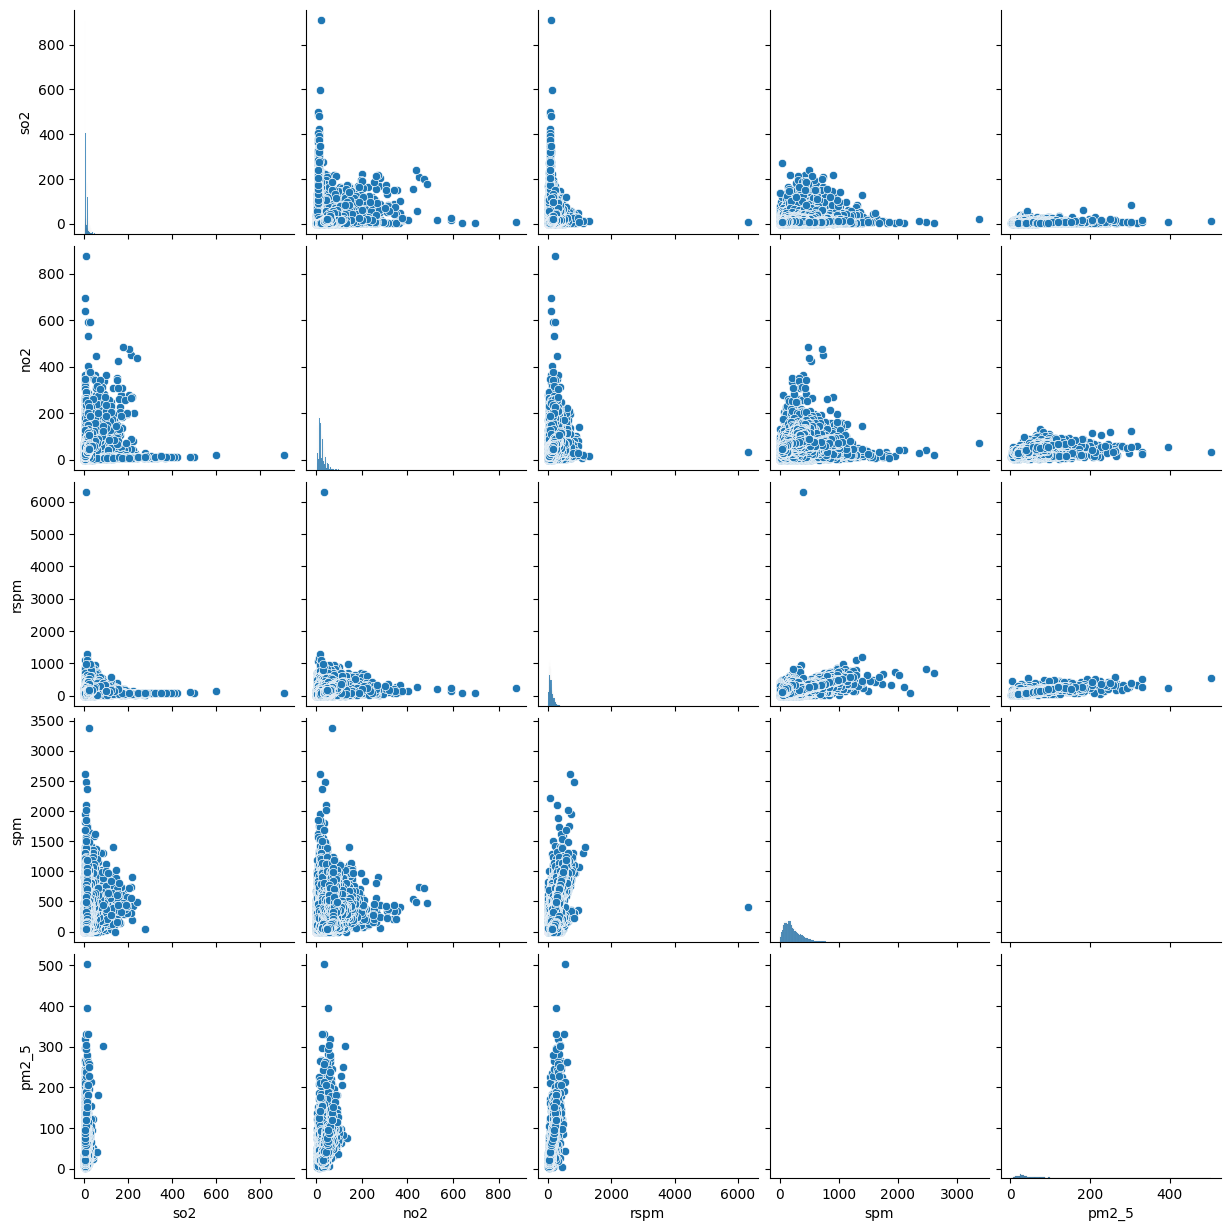

In [ ]:
import seaborn as sns
sns.pairplot(data=df)

In [ ]:
# Rename for clarity
df= df.rename(columns={'rspm':'pm10'})

In [ ]:
# Viewing the count of values present in the state column
df['state'].value_counts()

,count
state,
Maharashtra,60384
Uttar Pradesh,42816
Andhra Pradesh,26368
Punjab,25634
Rajasthan,25589
Kerala,24728
Himachal Pradesh,22896
West Bengal,22463
Gujarat,21279


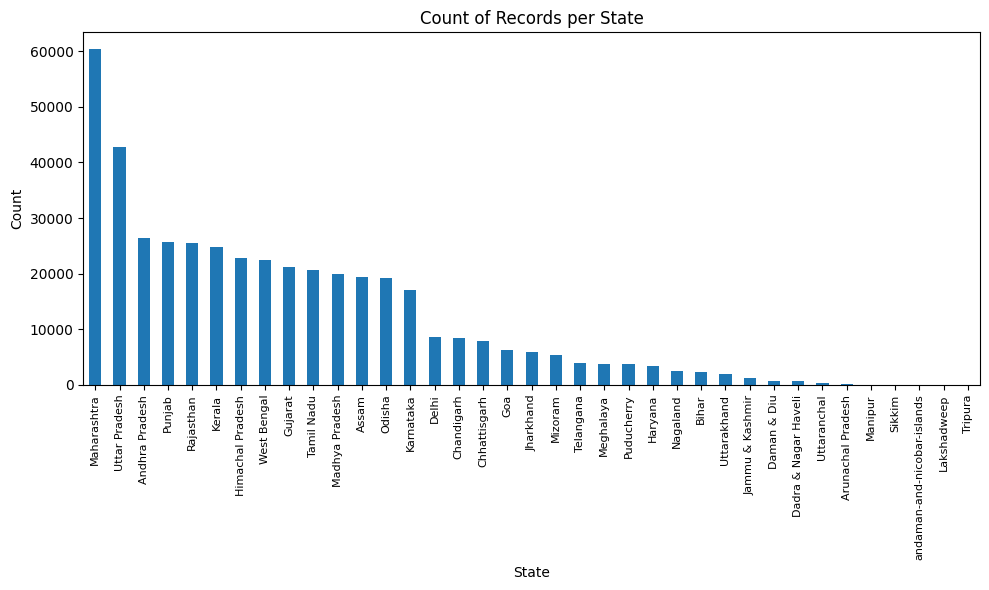

In [ ]:
# Plotting
state_counts = df['state'].value_counts()

plt.figure(figsize=(10, 6))
state_counts.plot(kind='bar')
plt.xlabel('State')
plt.ylabel('Count')
plt.title('Count of Records per State')
plt.xticks(rotation=90,fontsize=8)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [ ]:
# Example dataset
data = {
    'Type': [
        'Residential, Rural and other Areas', 'Industrial Area', 'Residential and others',
        'Industrial Areas', 'Sensitive Area', 'Sensitive Areas', 'RIRUO',
        'Sensitive', 'Industrial', 'Residential'
    ],
    'Count': [179014, 96091, 86791, 51747, 8980, 5536, 1304, 495, 233, 158]
}

df = pd.DataFrame(data)

# Define mapping rules
def categorize(type_str):
    s = type_str.lower()
    if "industrial" in s:
        return "Industrial"
    elif "residential" in s:
        return "Residential"
    elif "sensitive" in s:
        return "Sensitive"
    elif "rural" in s or "riruo" in s:
        return "Rural"
    else:
        return "Other"

# Apply mapping
df['Standard_Category'] = df['Type'].apply(categorize)

# Group by new category
grouped_df = df.groupby('Standard_Category')['Count'].sum().reset_index()
print(grouped_df)

  Standard_Category   Count
0        Industrial  148071
1       Residential  265963
2             Rural    1304
3         Sensitive   15011


<ipython-input-19-fcf98605234e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped_df, x='Standard_Category', y='Count', palette='Set2')


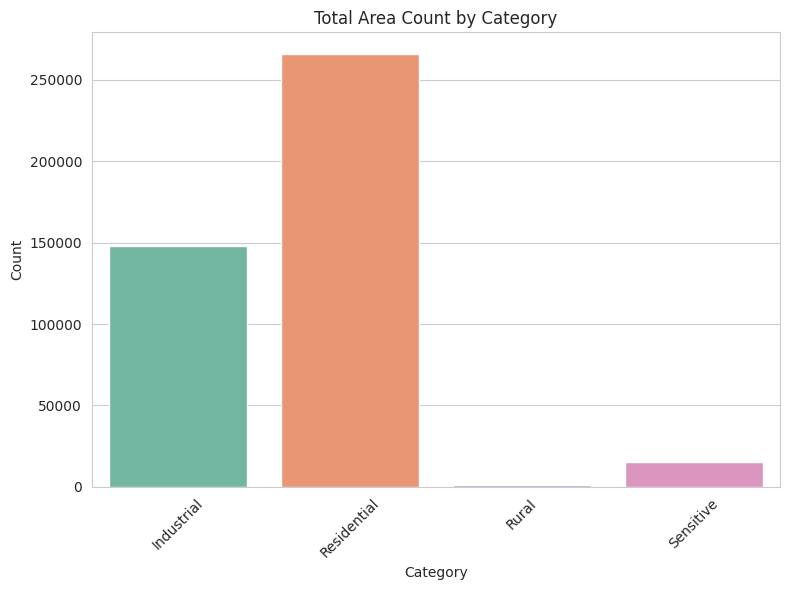

In [ ]:
# Plot
sns.set_style("whitegrid")
plt.figure(figsize=(8, 6))
sns.barplot(data=grouped_df, x='Standard_Category', y='Count', palette='Set2')
plt.title("Total Area Count by Category")
plt.xlabel("Category")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df.dropna(subset=['date'], inplace=True) #drop the rows with missing date

In [ ]:
df = df.dropna(subset=['date', 'location','state']) #drop the rows where these parameters are missing
df.shape

(435735, 13)

In [ ]:
# Convert text columns to lowercase (standardization)
df['state'] = df['state'].str.lower().str.strip()
df['location'] = df['location'].str.lower().str.strip()

In [ ]:
df = df.sort_values(['location', 'date'])


In [ ]:
df.head()

,stn_code,sampling_date,state,location,agency,type,so2,no2,pm10,spm,location_monitoring_station,pm2_5,date
368217,3.0,1/1/1987,uttar pradesh,agra,Uttar Pradesh Pollution Control Board,Industrial,16.1,NaN,NaN,141.0,NaN,NaN,1987-01-01
368221,4.0,2/1/1987,uttar pradesh,agra,Uttar Pradesh Pollution Control Board,Residential,16.2,4.9,NaN,571.0,NaN,NaN,1987-01-02
368229,3.0,4/1/1987,uttar pradesh,agra,Uttar Pradesh Pollution Control Board,Industrial,7.2,NaN,NaN,387.0,NaN,NaN,1987-01-04
368231,1.0,4/1/1987,uttar pradesh,agra,Central Pollution Control Board,Sensitive,15.9,17.9,NaN,415.0,NaN,NaN,1987-01-04
368234,3.0,5/1/1987,uttar pradesh,agra,Uttar Pradesh Pollution Control Board,Industrial,5.6,NaN,NaN,408.0,NaN,NaN,1987-01-05


###Treating null values

In [ ]:
pollutants = ['so2', 'no2', 'pm10', 'spm', 'pm2_5']
df[pollutants] = df[pollutants].apply(pd.to_numeric, errors='coerce')

In [ ]:
df = df.dropna(subset=['so2', 'no2', 'pm10', 'pm2_5'], how='all') #drops rows where all of these values are missing
df.shape

(431512, 13)

In [ ]:
df.isna().any().any()


np.True_

In [ ]:
df.isna().sum()

,0
stn_code,142243
sampling_date,0
state,0
location,0
agency,147601
type,5026
so2,30420
no2,12007
pm10,35996
spm,234714


In [ ]:
(df.isna().sum() / len(df))*100  #percent of missing data

,0
stn_code,32.963857
sampling_date,0.000000
state,0.000000
location,0.000000
agency,34.205538
type,1.164742
so2,7.049630
no2,2.782541
pm10,8.341831
spm,54.393389


pm2_5 has vary high missing values hence we can drop that column

For no2,so2,pm10 we can use median per location for filling the null values

In [ ]:
df.drop(columns=['pm2_5', 'spm', 'agency', 'stn_code'], inplace=True)

In [ ]:
df.head()

,sampling_date,state,location,type,so2,no2,pm10,location_monitoring_station,date
368217,1/1/1987,uttar pradesh,agra,Industrial,16.1,NaN,NaN,NaN,1987-01-01
368221,2/1/1987,uttar pradesh,agra,Residential,16.2,4.9,NaN,NaN,1987-01-02
368229,4/1/1987,uttar pradesh,agra,Industrial,7.2,NaN,NaN,NaN,1987-01-04
368231,4/1/1987,uttar pradesh,agra,Sensitive,15.9,17.9,NaN,NaN,1987-01-04
368234,5/1/1987,uttar pradesh,agra,Industrial,5.6,NaN,NaN,NaN,1987-01-05


In [ ]:
#filling the null values in so2,no2,pm10 columns
for col in ['so2', 'no2', 'pm10']:
    df[col] = df.groupby('location')[col].transform(lambda x: x.fillna(x.median()))

In [ ]:
#filling the null values in text columns
df['type'] = df['type'].fillna('Unknown')
df['location_monitoring_station'] = df['location_monitoring_station'].fillna('Unknown')

In [ ]:
df.isna().sum()

,0
sampling_date,0
state,0
location,0
type,0
so2,61
no2,45
pm10,4681
location_monitoring_station,0
date,0


In [ ]:
df.dropna(inplace=True) #drop rows still with any missing

In [ ]:
df.isna().sum()

,0
sampling_date,0
state,0
location,0
type,0
so2,0
no2,0
pm10,0
location_monitoring_station,0
date,0


In [ ]:
df.shape

(426770, 9)

In [ ]:
df.drop_duplicates() #drops the duplicate rows
df.shape

(426770, 9)

## Calculating AQI using the standard formula stated by CPCB

In [ ]:
def calculate_sub_index(cp, pollutant):
    breakpoints = {
        #'pm2_5': [(0, 30, 0, 50), (31, 60, 51, 100), (61, 90, 101, 200),
        #         (91, 120, 201, 300), (121, 250, 301, 400), (251, 350, 401, 500)],
        'pm10': [(0, 50, 0, 50), (51, 100, 51, 100), (101, 250, 101, 200),
                 (251, 350, 201, 300), (351, 430, 301, 400), (431, 500, 401, 500)],
        'no2': [(0, 40, 0, 50), (41, 80, 51, 100), (81, 180, 101, 200),
                (181, 280, 201, 300), (281, 400, 301, 400), (401, 500, 401, 500)],
        'so2': [(0, 40, 0, 50), (41, 80, 51, 100), (81, 380, 101, 200),
                (381, 800, 201, 300), (801, 1600, 301, 400), (1601, 2000, 401, 500)]
    }
    for bp_lo, bp_hi, i_lo, i_hi in breakpoints[pollutant]:
        if bp_lo <= cp <= bp_hi:
            return ((i_hi - i_lo) / (bp_hi - bp_lo)) * (cp - bp_lo) + i_lo
    return np.nan

In [ ]:
def compute_aqi(row):
    sub_indices = []
    for pollutant in ['pm10', 'no2', 'so2']:
        if pd.notna(row[pollutant]):
            sub_index = calculate_sub_index(row[pollutant], pollutant)
            if sub_index is not None:
                sub_indices.append(sub_index)
    return max(sub_indices) if sub_indices else np.nan


In [ ]:
df['aqi'] = df.apply(compute_aqi, axis=1)
df = df.dropna(subset=['aqi'])


In [ ]:
df.head()

,sampling_date,state,location,type,so2,no2,pm10,location_monitoring_station,date,aqi
368217,1/1/1987,uttar pradesh,agra,Industrial,16.1,16.0,166.0,Unknown,1987-01-01,144.187919
368221,2/1/1987,uttar pradesh,agra,Residential,16.2,4.9,166.0,Unknown,1987-01-02,144.187919
368229,4/1/1987,uttar pradesh,agra,Industrial,7.2,16.0,166.0,Unknown,1987-01-04,144.187919
368231,4/1/1987,uttar pradesh,agra,Sensitive,15.9,17.9,166.0,Unknown,1987-01-04,144.187919
368234,5/1/1987,uttar pradesh,agra,Industrial,5.6,16.0,166.0,Unknown,1987-01-05,144.187919


In [ ]:
# Remove outliers using IQR for 'aqi'
Q1 = df['aqi'].quantile(0.25)
Q3 = df['aqi'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['aqi'] >= lower_bound) & (df['aqi'] <= upper_bound)]

## Feature engineering

In [ ]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
# df['day'] = df['date'].dt.day
df['day_of_week'] = df['date'].dt.dayofweek
# df['is_weekend'] = df['day_of_week'] >= 5

In [ ]:
def get_season(month):
    if month in [12, 1, 2]:
        return 'winter'
    elif month in [3, 4, 5]:
        return 'summer'
    elif month in [6, 7, 8, 9]:
        return 'monsoon'
    else:
        return 'post_monsoon'

df['season'] = df['month'].apply(get_season)

In [ ]:
df['state'] = df['state'].astype('category')
df['location'] = df['location'].astype('category')
df['season'] = df['season'].astype('category')

In [ ]:
print(df[['state', 'location', 'date', 'month', 'season', 'aqi']].head())

                state location       date  month  season         aqi
368217  uttar pradesh     agra 1987-01-01      1  winter  144.187919
368221  uttar pradesh     agra 1987-01-02      1  winter  144.187919
368229  uttar pradesh     agra 1987-01-04      1  winter  144.187919
368231  uttar pradesh     agra 1987-01-04      1  winter  144.187919
368234  uttar pradesh     agra 1987-01-05      1  winter  144.187919


In [ ]:
#Create rolling features: past 7 days' AQI for each location
def create_lag_features(df, n_lags=7):
    df_lagged = df.copy()
    for lag in range(1, n_lags + 1):
        df_lagged[f'aqi_lag_{lag}'] = df_lagged.groupby('location')['aqi'].shift(lag)
    return df_lagged

df = create_lag_features(df)

<ipython-input-40-7b16b86dabf2>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_lagged[f'aqi_lag_{lag}'] = df_lagged.groupby('location')['aqi'].shift(lag)
<ipython-input-40-7b16b86dabf2>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_lagged[f'aqi_lag_{lag}'] = df_lagged.groupby('location')['aqi'].shift(lag)
<ipython-input-40-7b16b86dabf2>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_lagged[f'aqi_lag_{lag}

In [ ]:
#Drop rows with NaN due to shifting (first 7 days per location)
df = df.dropna(subset=[f'aqi_lag_{i}' for i in range(1, 8)] + ['aqi'])

EDA

In [ ]:
import seaborn as sns


In [ ]:
sns.set(style="whitegrid")

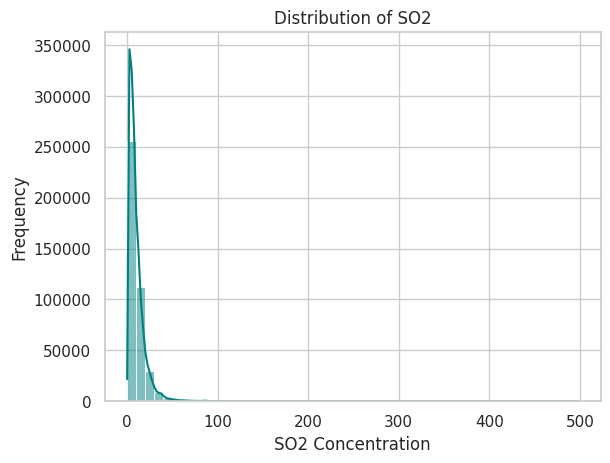

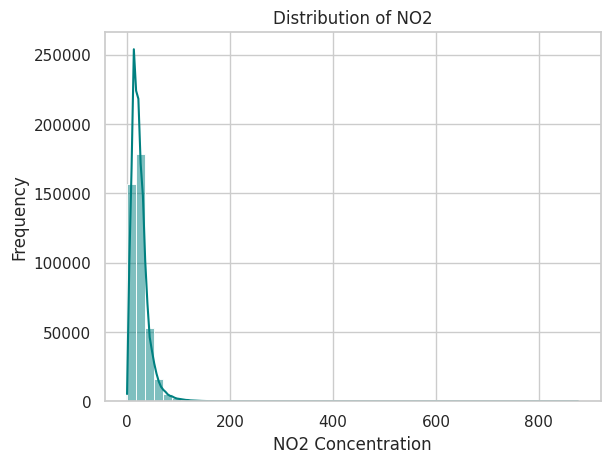

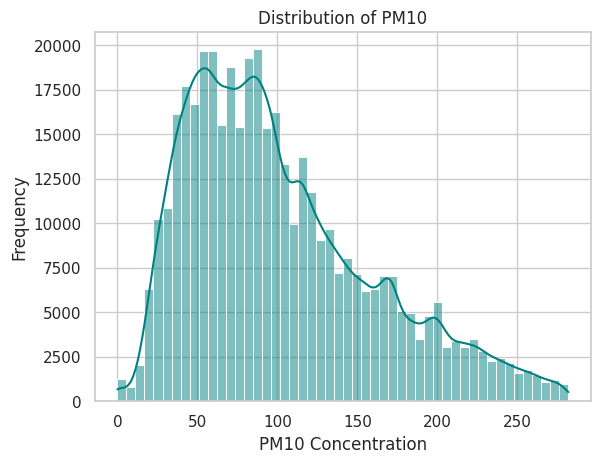

In [ ]:
# 1. Distribution of Pollutants
pollutants = ['so2', 'no2', 'pm10']
for col in pollutants:

    sns.histplot(df[col].dropna(), bins=50, kde=True, color='teal')
    plt.title(f'Distribution of {col.upper()}')
    plt.xlabel(f'{col.upper()} Concentration')
    plt.ylabel('Frequency')
    plt.show()

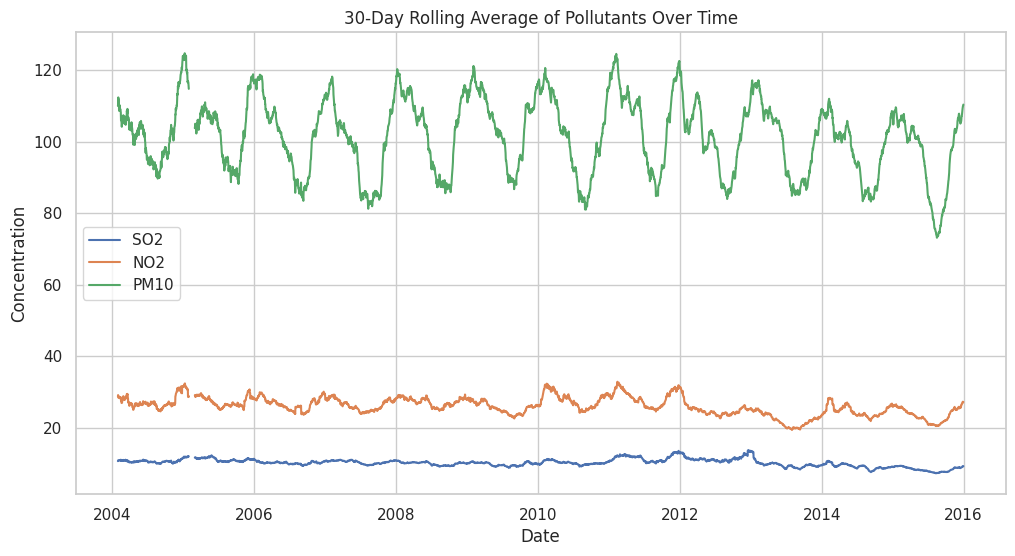

In [ ]:
# 2. Time Series of Pollutants (Rolling Mean)
df_daily = df.set_index('date').resample('D')[pollutants].mean().rolling(30).mean()

plt.figure(figsize=(12, 6))
for col in pollutants:
    plt.plot(df_daily[col], label=col.upper())
plt.title('30-Day Rolling Average of Pollutants Over Time')
plt.xlabel('Date')
plt.ylabel('Concentration')
plt.legend()
plt.show()

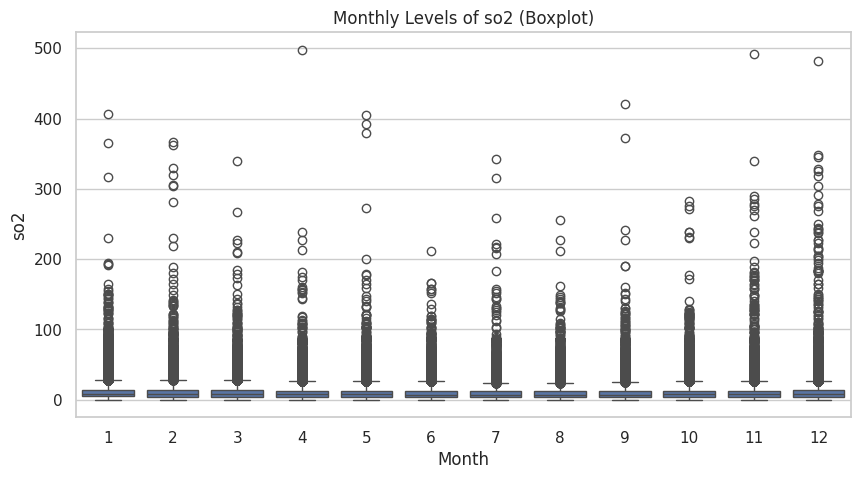

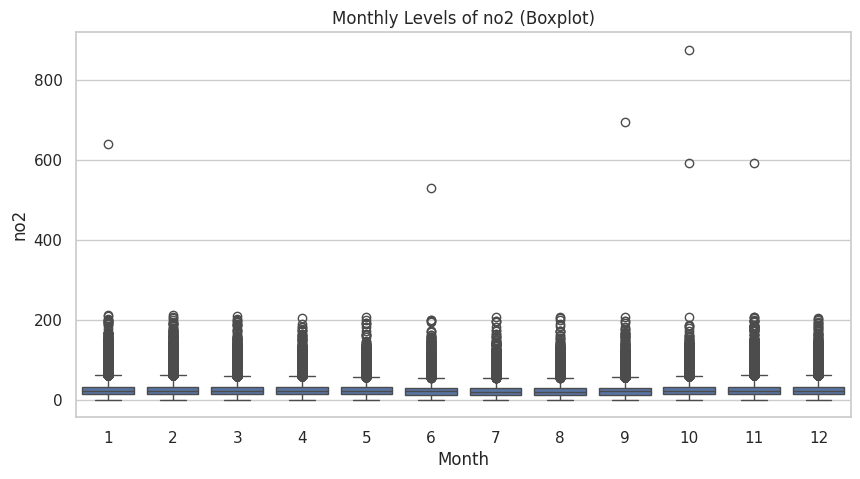

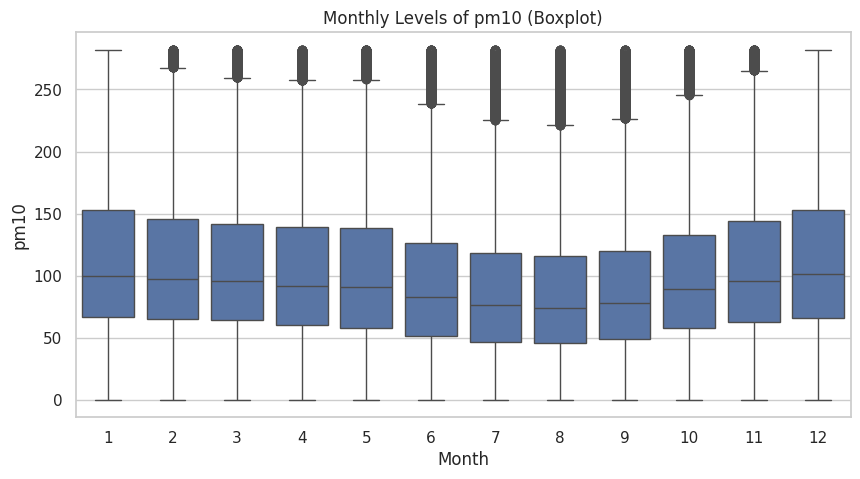

In [ ]:
# 3. Monthly Trends
for col in pollutants:
  plt.figure(figsize=(10, 5))
  sns.boxplot(x='month', y=col, data=df)
  plt.title(f'Monthly Levels of {col} (Boxplot)')
  plt.xlabel('Month')
  plt.ylabel(col)
  plt.show()

<ipython-input-47-4d82b0db7877>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_states = df.groupby('state')['pm10'].mean().sort_values(ascending=False).head(15)
<ipython-input-47-4d82b0db7877>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_states.values, y=top_states.index, palette='Reds_r')


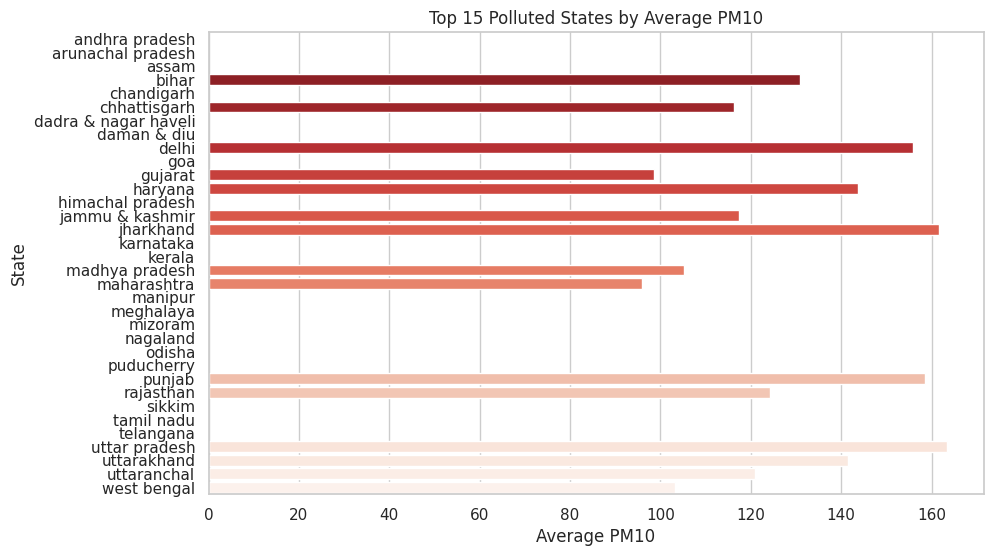

In [ ]:
# 4. Most Polluted States (by average PM10)
top_states = df.groupby('state')['pm10'].mean().sort_values(ascending=False).head(15)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_states.values, y=top_states.index, palette='Reds_r')
plt.title('Top 15 Polluted States by Average PM10')
plt.xlabel('Average PM10')
plt.ylabel('State')
plt.show()

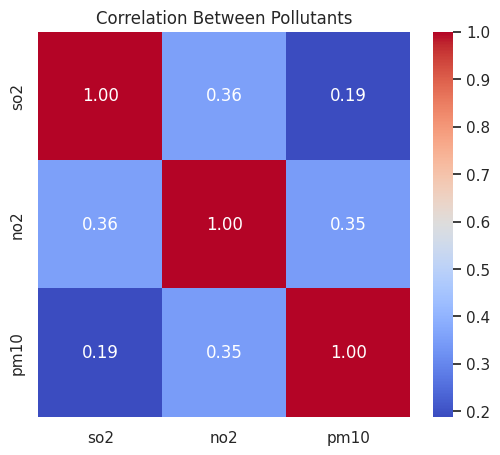

In [ ]:
# 5. Correlation Heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(df[pollutants].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Pollutants')
plt.show()

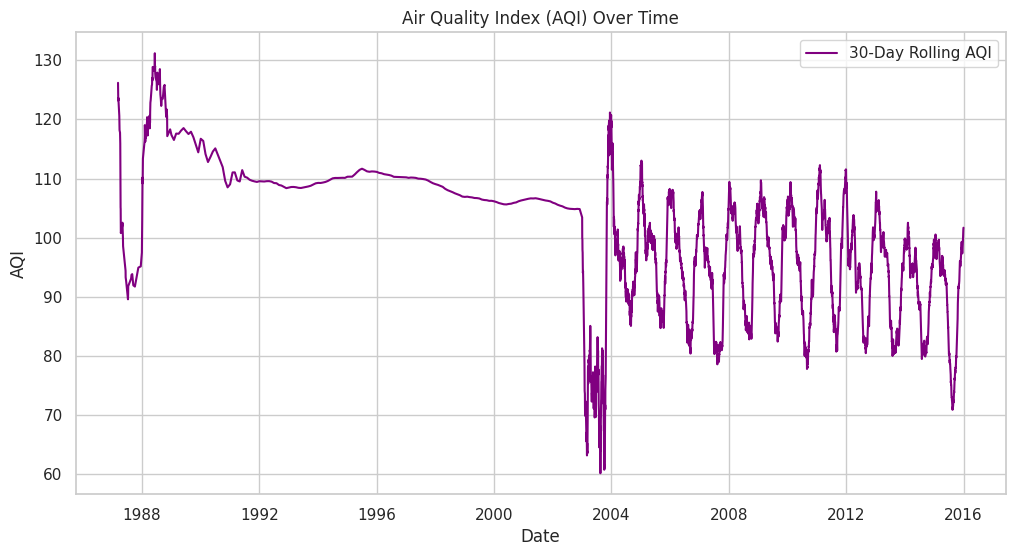

In [ ]:
aqi_daily = df[['date', 'aqi']].groupby('date').mean().rolling(30).mean()

plt.figure(figsize=(12, 6))
plt.plot(aqi_daily, color='purple', label='30-Day Rolling AQI')
plt.title('Air Quality Index (AQI) Over Time')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.legend()
plt.show()

<ipython-input-50-9edf0460f56c>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  state_aqi = df.groupby('state')['aqi'].mean().sort_values(ascending=False).head(15)
<ipython-input-50-9edf0460f56c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_aqi.values, y=state_aqi.index, palette='Spectral')


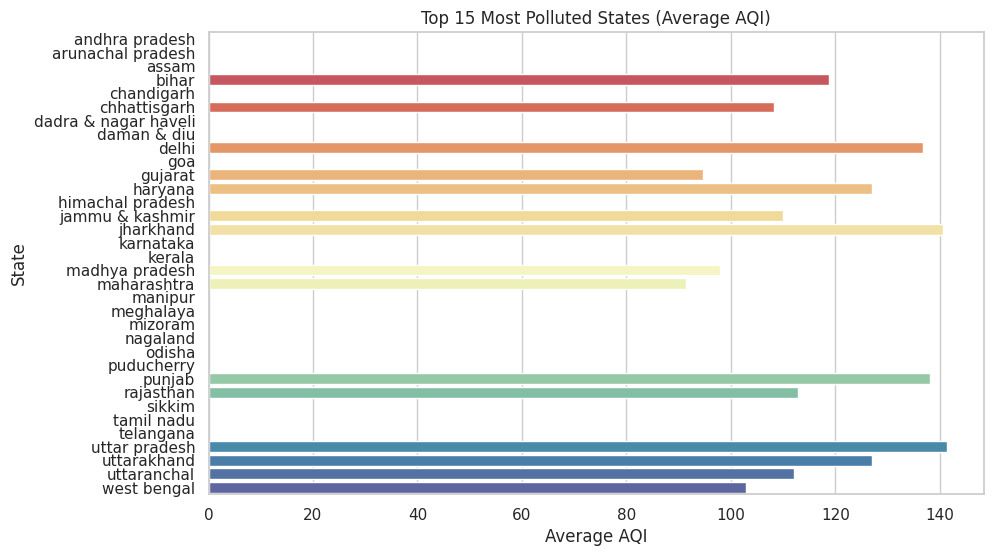

In [ ]:
state_aqi = df.groupby('state')['aqi'].mean().sort_values(ascending=False).head(15)

plt.figure(figsize=(10, 6))
sns.barplot(x=state_aqi.values, y=state_aqi.index, palette='Spectral')
plt.title('Top 15 Most Polluted States (Average AQI)')
plt.xlabel('Average AQI')
plt.ylabel('State')
plt.show()


<ipython-input-51-328c663700bd>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='month', y='aqi', data=df, palette='coolwarm')


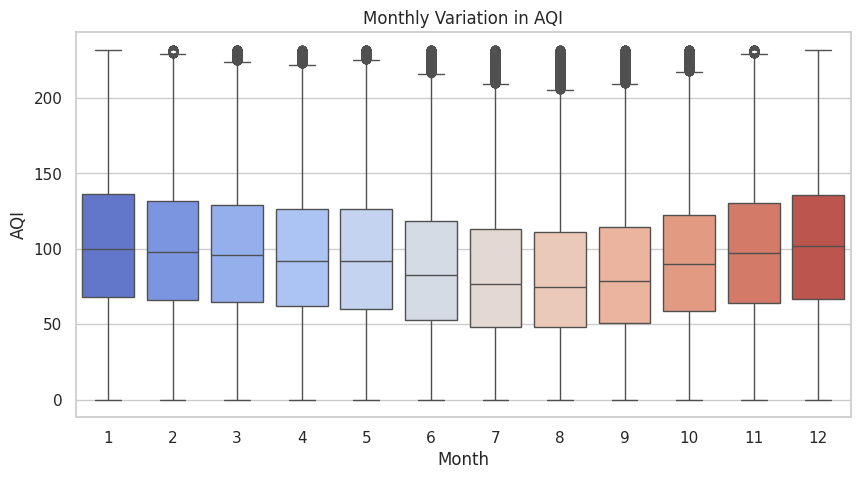

In [ ]:
df['month'] = df['date'].dt.month

plt.figure(figsize=(10, 5))
sns.boxplot(x='month', y='aqi', data=df, palette='coolwarm')
plt.title('Monthly Variation in AQI')
plt.xlabel('Month')
plt.ylabel('AQI')
plt.show()


<ipython-input-52-fc9db1147478>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='aqi_category', order=['Good', 'Satisfactory', 'Moderate', 'Poor', 'Very Poor', 'Severe'],


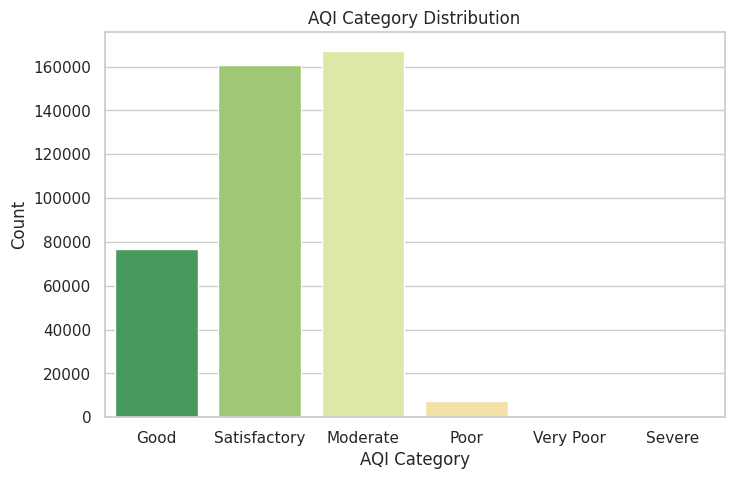

In [ ]:
def categorize_aqi(aqi):
    if aqi <= 50: return 'Good'
    elif aqi <= 100: return 'Satisfactory'
    elif aqi <= 200: return 'Moderate'
    elif aqi <= 300: return 'Poor'
    elif aqi <= 400: return 'Very Poor'
    else: return 'Severe'

df['aqi_category'] = df['aqi'].apply(categorize_aqi)

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='aqi_category', order=['Good', 'Satisfactory', 'Moderate', 'Poor', 'Very Poor', 'Severe'],
              palette='RdYlGn_r')
plt.title('AQI Category Distribution')
plt.xlabel('AQI Category')
plt.ylabel('Count')
plt.show()


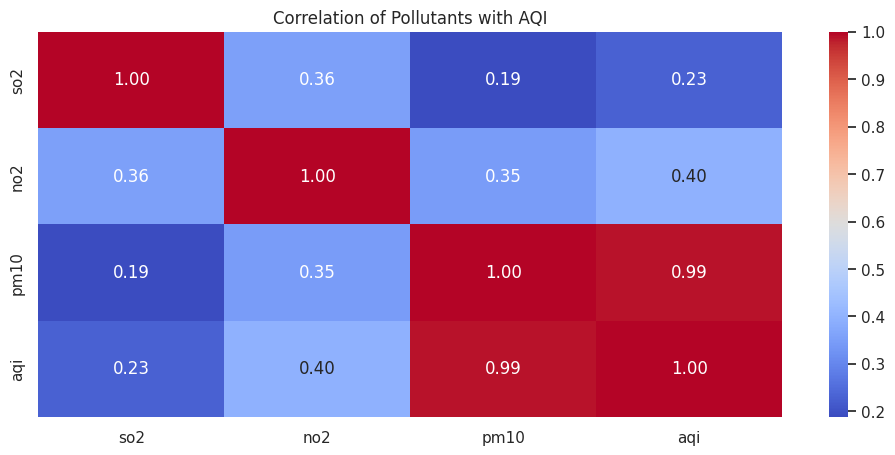

In [ ]:
#Relationship Between Pollutants and AQI
plt.figure(figsize=(12, 5))
sns.heatmap(df[['so2', 'no2', 'pm10', 'aqi']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation of Pollutants with AQI')
plt.show()


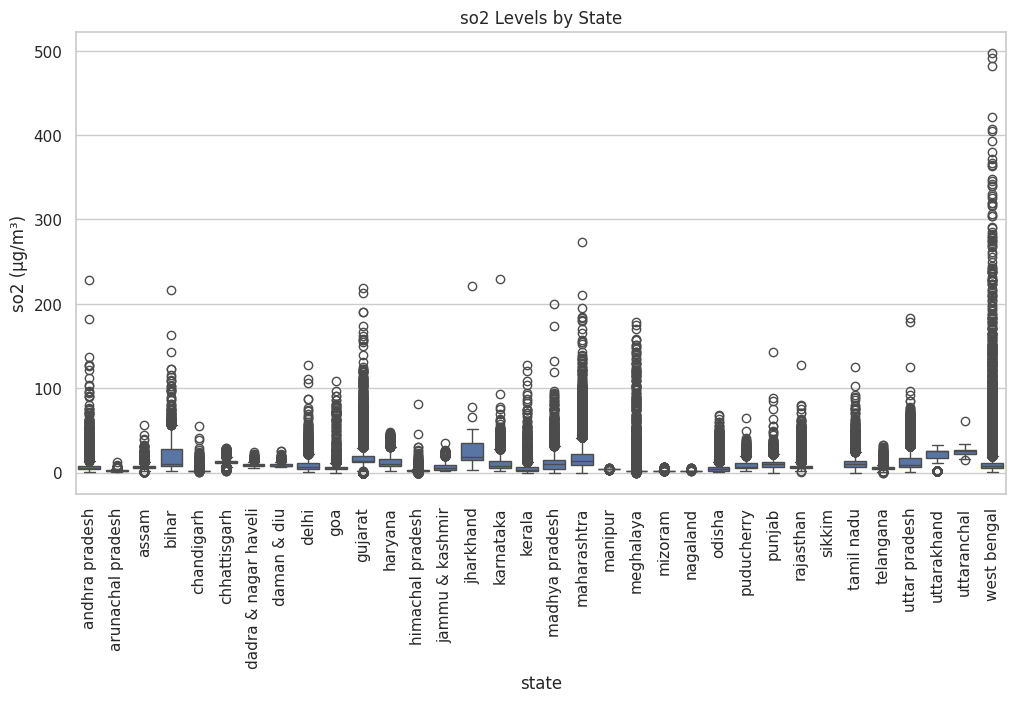

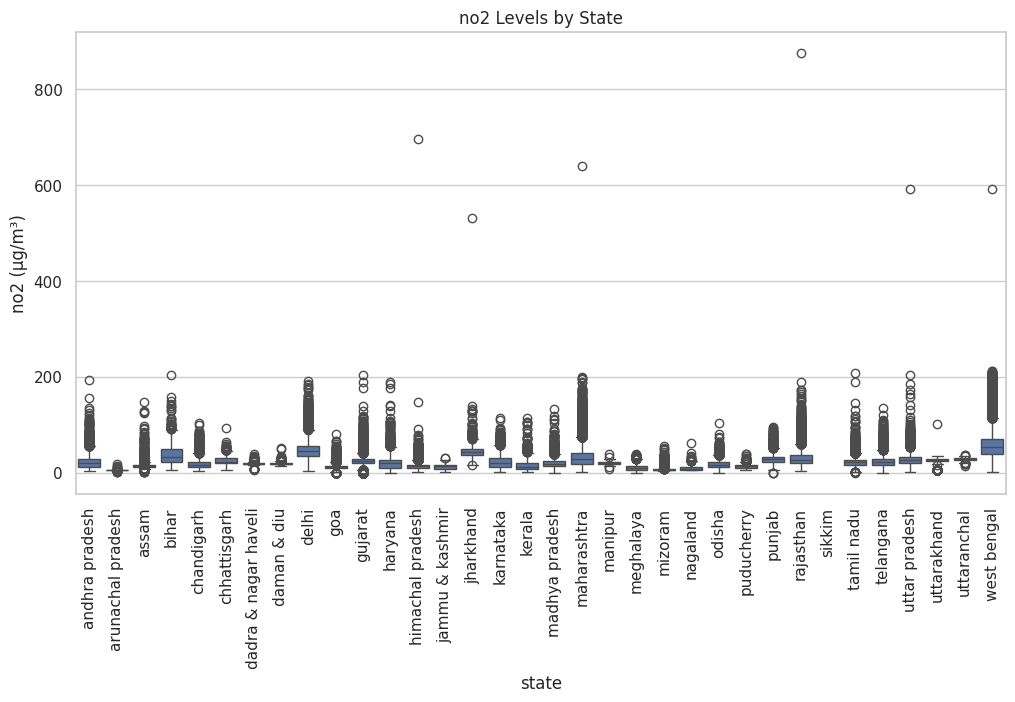

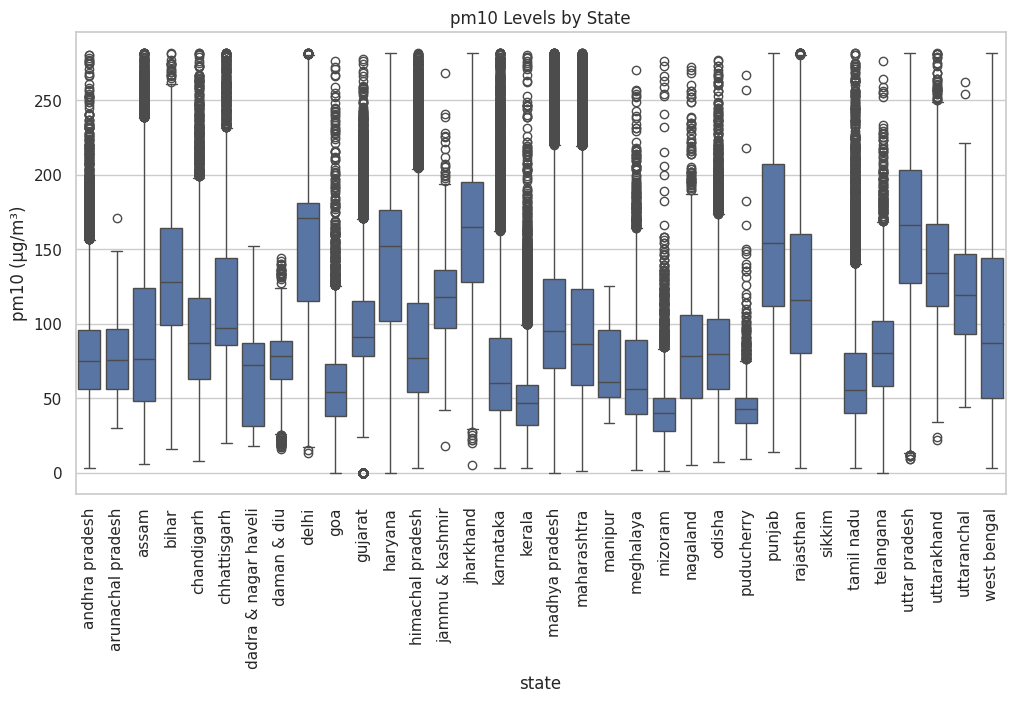

In [ ]:
for pol in pollutants:
  plt.figure(figsize=(12, 6))
  sns.boxplot(x='state', y=pol, data=df)
  plt.xticks(rotation=90)
  plt.title(f'{pol} Levels by State')
  plt.ylabel(f'{pol} (µg/m³)')
  plt.show()

<ipython-input-55-8bd4d92814a4>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x=df['month'], y=pol, data=df, ci=None)


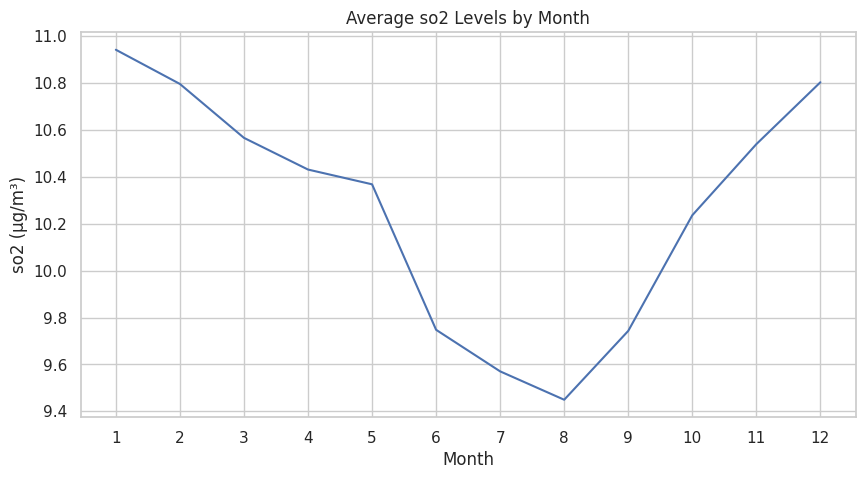

<ipython-input-55-8bd4d92814a4>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x=df['month'], y=pol, data=df, ci=None)


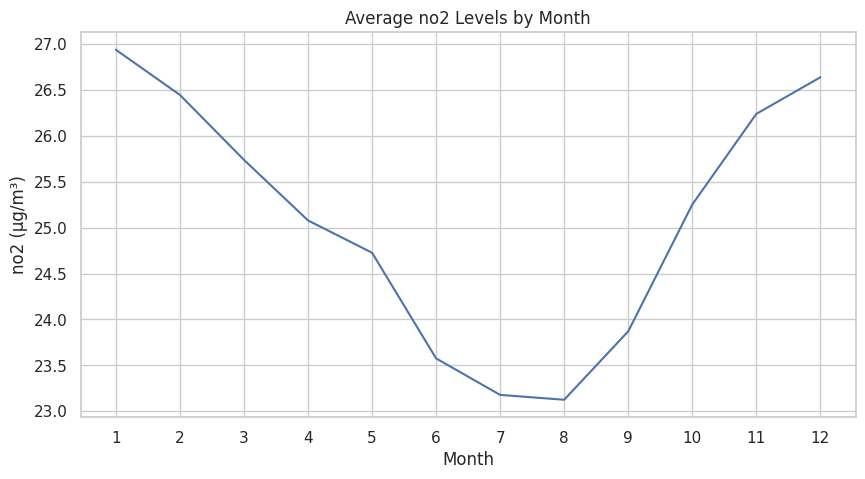

<ipython-input-55-8bd4d92814a4>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x=df['month'], y=pol, data=df, ci=None)


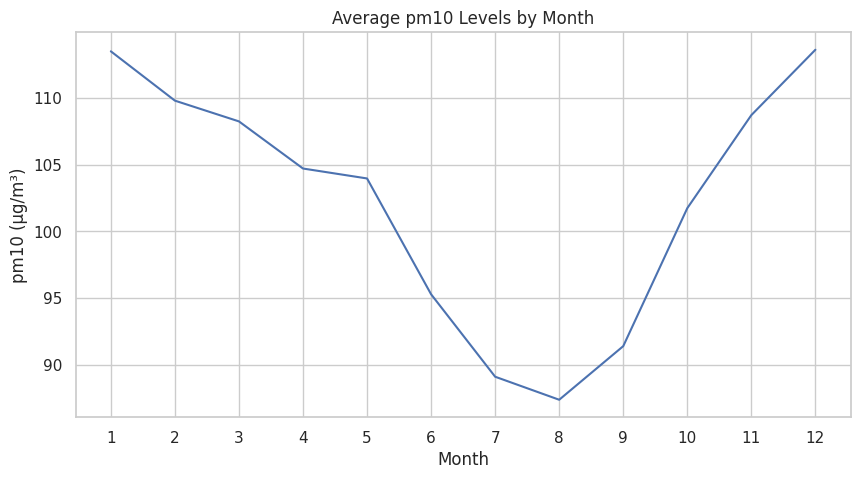

In [ ]:
for pol in pollutants:
  plt.figure(figsize=(10, 5))
  sns.lineplot(x=df['month'], y=pol, data=df, ci=None)
  plt.title(f'Average {pol} Levels by Month')
  plt.xlabel('Month')
  plt.ylabel(f'{pol} (µg/m³)')
  plt.xticks(range(1, 13))
  plt.grid(True)
  plt.show()

<ipython-input-56-79c860d0b2d8>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='year', y=pol, data=df, ci=None)


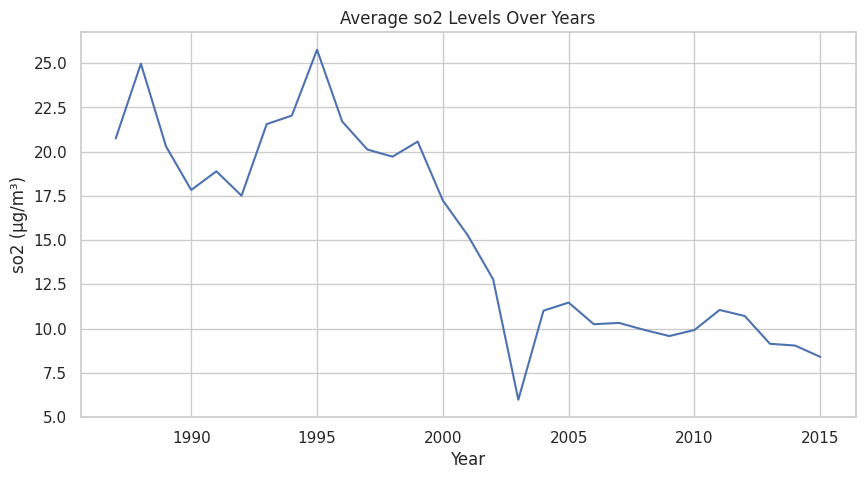

<ipython-input-56-79c860d0b2d8>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='year', y=pol, data=df, ci=None)


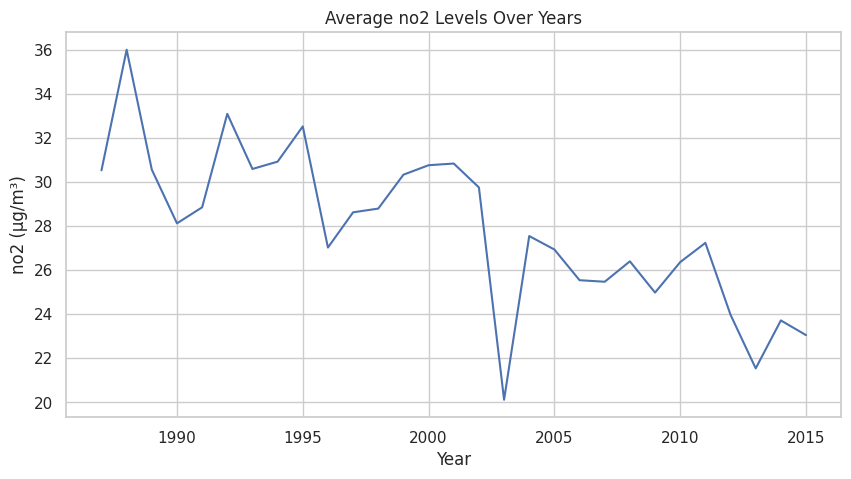

<ipython-input-56-79c860d0b2d8>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='year', y=pol, data=df, ci=None)


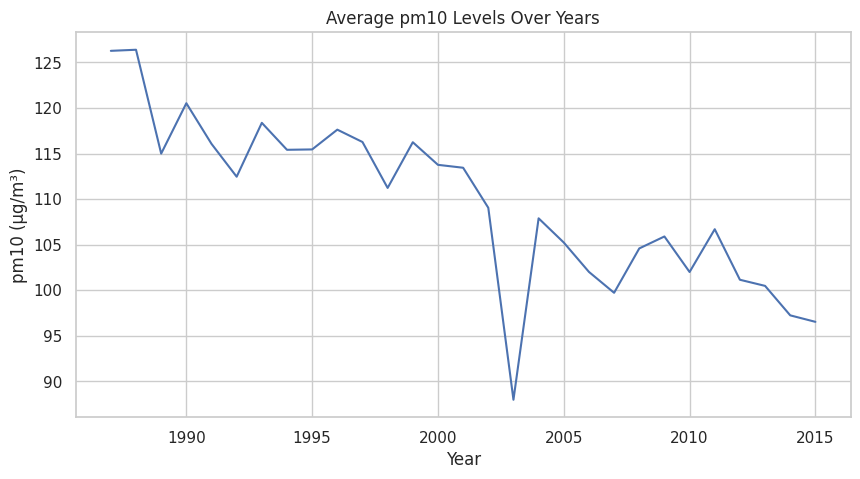

In [ ]:
for pol in pollutants:
  plt.figure(figsize=(10, 5))
  sns.lineplot(x='year', y=pol, data=df, ci=None)
  plt.title(f'Average {pol} Levels Over Years')
  plt.xlabel('Year')
  plt.ylabel(f'{pol} (µg/m³)')
  plt.grid(True)
  plt.show()

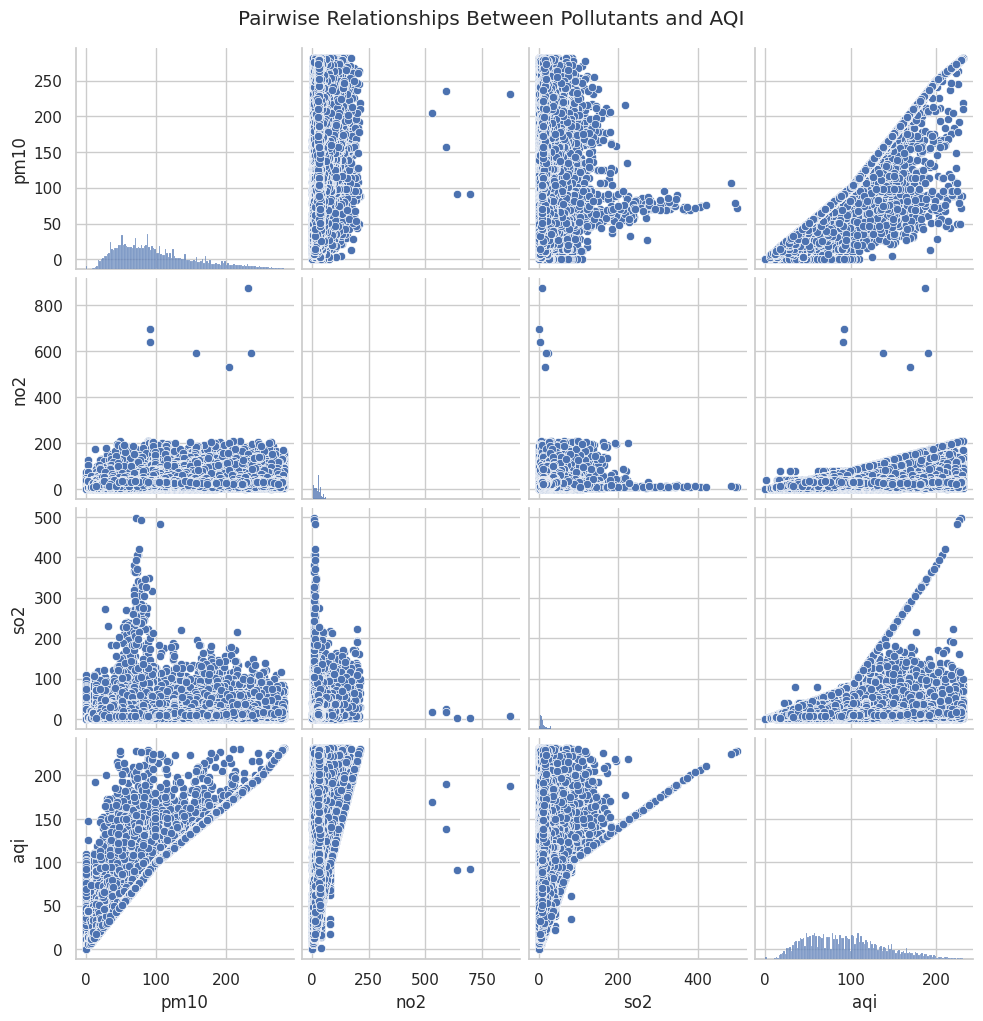

In [ ]:
sns.pairplot(df[['pm10', 'no2', 'so2', 'aqi']].dropna())
plt.suptitle("Pairwise Relationships Between Pollutants and AQI", y=1.02)
plt.show()


##**Model- prediction of AQI based on region and time and using the past 7 days AQI values**


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
# !pip install catboost
from catboost import CatBoostRegressor

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 9.4 MB/s eta 0:00:00


In [ ]:
df['location_id'] = df['state'].astype(str) + '_' + df['location'].astype(str)
le = LabelEncoder()
df['location_enc'] = le.fit_transform(df['location_id'])

In [ ]:
df.head()

,sampling_date,state,location,type,so2,no2,pm10,location_monitoring_station,date,aqi,...,aqi_lag_1,aqi_lag_2,aqi_lag_3,aqi_lag_4,aqi_lag_5,aqi_lag_6,aqi_lag_7,aqi_category,location_id,location_enc
368245,7/1/1987,uttar pradesh,agra,Residential,6.0,4.7,166.0,Unknown,1987-01-07,144.187919,...,144.187919,144.187919,144.187919,144.187919,144.187919,144.187919,144.187919,Moderate,uttar pradesh_agra,254
368247,7/1/1987,uttar pradesh,agra,Sensitive,4.2,8.8,166.0,Unknown,1987-01-07,144.187919,...,144.187919,144.187919,144.187919,144.187919,144.187919,144.187919,144.187919,Moderate,uttar pradesh_agra,254
368251,8/1/1987,uttar pradesh,agra,Residential,4.8,3.5,166.0,Unknown,1987-01-08,144.187919,...,144.187919,144.187919,144.187919,144.187919,144.187919,144.187919,144.187919,Moderate,uttar pradesh_agra,254
368252,8/1/1987,uttar pradesh,agra,Sensitive,3.2,5.5,166.0,Unknown,1987-01-08,144.187919,...,144.187919,144.187919,144.187919,144.187919,144.187919,144.187919,144.187919,Moderate,uttar pradesh_agra,254
368254,9/1/1987,uttar pradesh,agra,Residential,5.2,3.8,166.0,Unknown,1987-01-09,144.187919,...,144.187919,144.187919,144.187919,144.187919,144.187919,144.187919,144.187919,Moderate,uttar pradesh_agra,254


In [ ]:
feature_cols = [f'aqi_lag_{i}' for i in range(1, 8)] + ['month', 'day_of_week', 'location_enc']
X = df[feature_cols]
y = df['aqi']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
models = {
    'RandomForest': RandomForestRegressor(n_estimators=100, random_state=42),
    'AdaBoost': AdaBoostRegressor(n_estimators=100, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=100, random_state=42),
    'CatBoost': CatBoostRegressor(verbose=0, random_state=42),
}

In [ ]:
results={}

## 1. Using Random Forest Regressor

In [ ]:
RFG_model= RandomForestRegressor(n_estimators=100, random_state=42)
RFG_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
y_pred = RFG_model.predict(X_test)
mae= mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
results['RFG'] = (mae,rmse, r2)
print("MAE:", mae)
print("RMSE:", rmse)
print("R² Score:", r2)


MAE: 19.9417439942289
RMSE: 28.584254217516342
R² Score: 0.6144123789064442


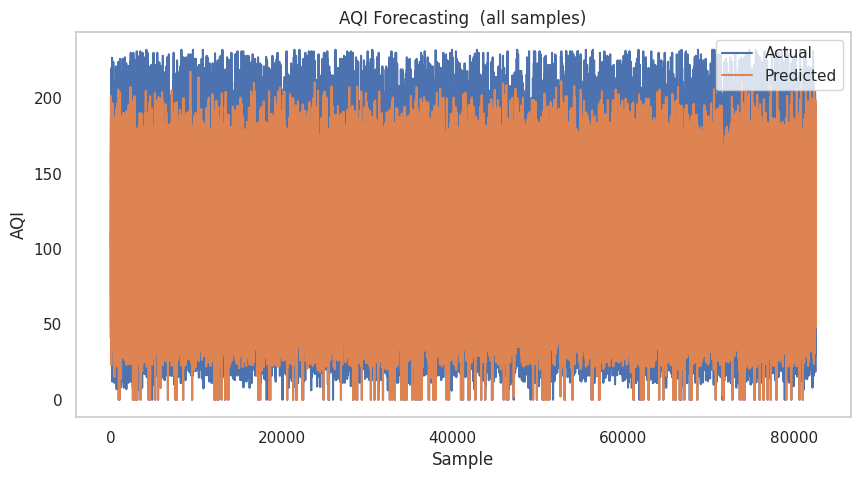

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(y_test.values[:], label='Actual')
plt.plot(y_pred[:], label='Predicted')
plt.legend()
plt.title('AQI Forecasting  (all samples)')
plt.xlabel('Sample')
plt.ylabel('AQI')
plt.grid()
plt.show()


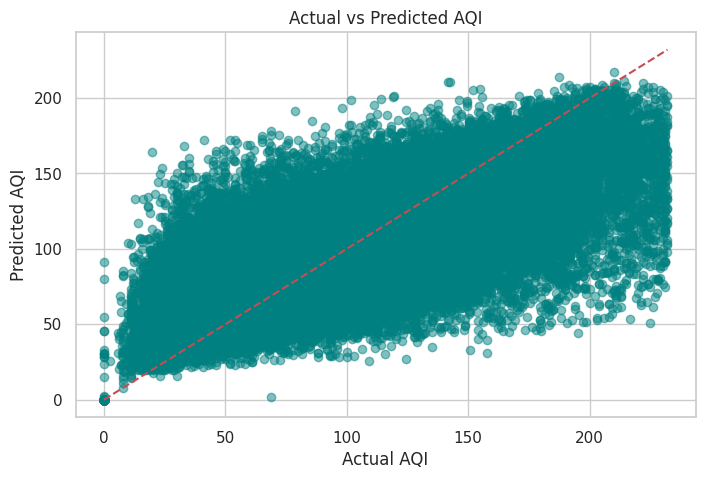

In [ ]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.5, color='teal')
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')
plt.title('Actual vs Predicted AQI')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.grid(True)
plt.show()

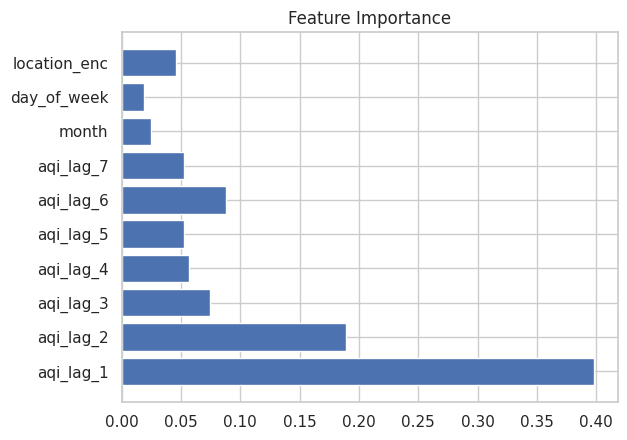

In [ ]:
importances = RFG_model.feature_importances_
features = X.columns
plt.barh(features, importances)
plt.title("Feature Importance")
plt.show()

## 2. Using XGBRegressor

In [ ]:
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred = xgb_model.predict(X_test)
mae= mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
results['XGBRegressor'] = (mae,rmse, r2)
print("MAE:", mae)
print("RMSE:", rmse)
print("R² Score:", r2)

MAE: 19.81854500423513
RMSE: 28.200933599627454
R² Score: 0.6246846529652238


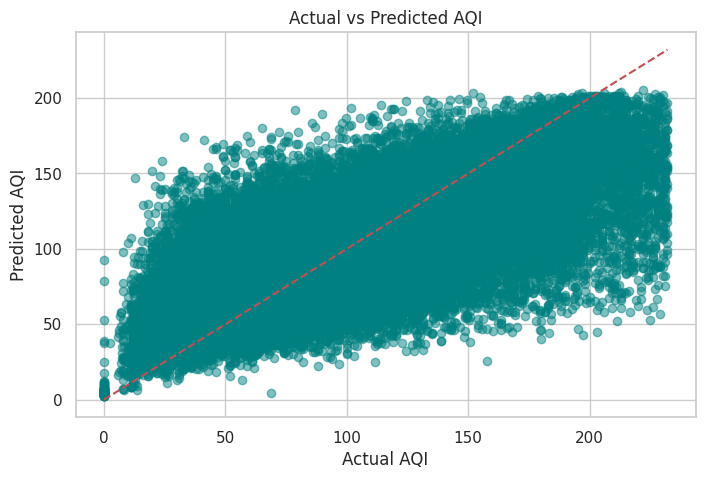

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.5, color='teal')
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')
plt.title('Actual vs Predicted AQI')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.grid(True)
plt.show()

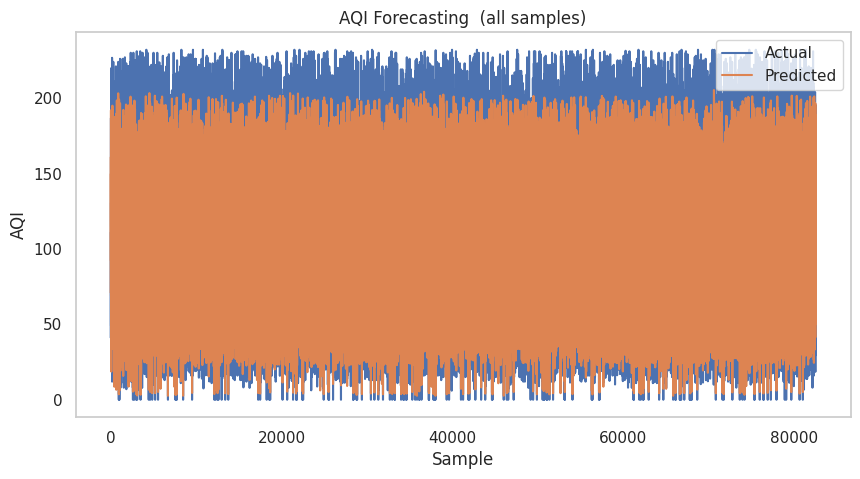

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(y_test.values[:], label='Actual')
plt.plot(y_pred[:], label='Predicted')
plt.legend()
plt.title('AQI Forecasting  (all samples)')
plt.xlabel('Sample')
plt.ylabel('AQI')
plt.grid()
plt.show()


## 3. Using AdaBoostRegressor

In [ ]:
ada_model = AdaBoostRegressor(n_estimators=100, random_state=42)
ada_model.fit(X_train, y_train)

AdaBoostRegressor(n_estimators=100, random_state=42)

In [ ]:
y_pred = ada_model.predict(X_test)
mae= mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
results['AdaBoost'] = (mae,rmse, r2)
print("MAE:", mae)
print("RMSE:", rmse)
print("R² Score:", r2)

MAE: 29.82437866810807
RMSE: 36.668296783641495
R² Score: 0.3654719474532949


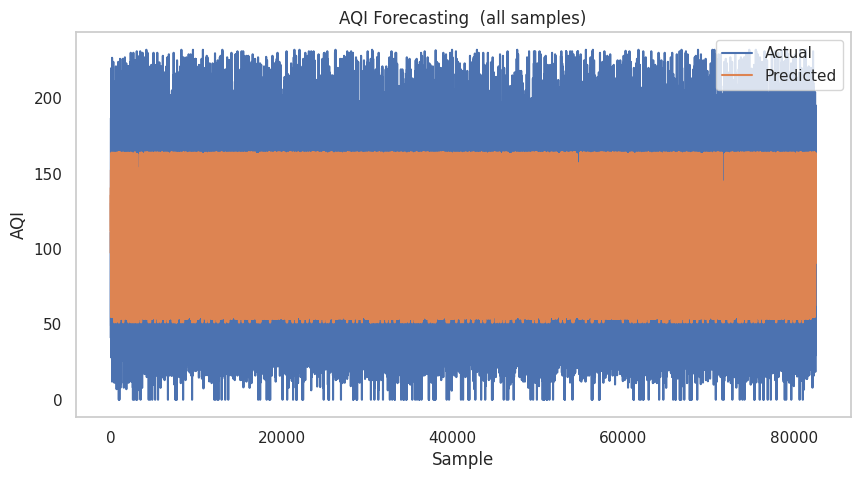

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(y_test.values[:], label='Actual')
plt.plot(y_pred[:], label='Predicted')
plt.legend()
plt.title('AQI Forecasting  (all samples)')
plt.xlabel('Sample')
plt.ylabel('AQI')
plt.grid()
plt.show()

## 4. Using CatBoost Regressor

In [ ]:
# !pip install catboost
from catboost import CatBoostRegressor

cat_model= CatBoostRegressor(verbose=0, learning_rate=0.1)
cat_model.fit(X_train, y_train)

In [ ]:
y_pred = cat_model.predict(X_test)
mae= mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
results['CatBoost'] = (mae,rmse, r2)
print("MAE:", mae)
print("RMSE:", rmse)
print("R² Score:", r2)

MAE: 19.545235084042798
RMSE: 27.862485840672885
R² Score: 0.6336391372202909


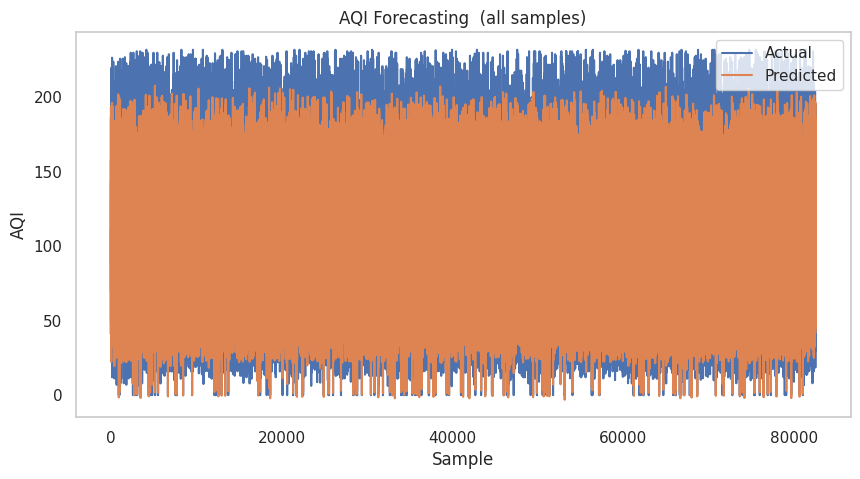

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(y_test.values[:], label='Actual')
plt.plot(y_pred[:], label='Predicted')
plt.legend()
plt.title('AQI Forecasting  (all samples)')
plt.xlabel('Sample')
plt.ylabel('AQI')
plt.grid()
plt.show()

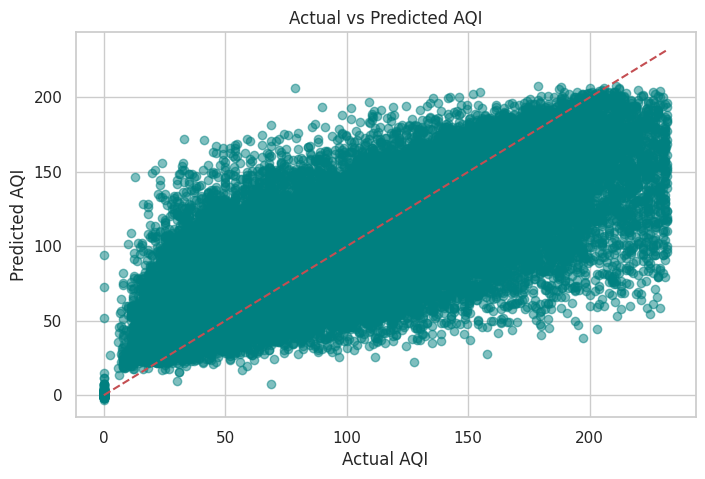

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.5, color='teal')
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')
plt.title('Actual vs Predicted AQI')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.grid(True)
plt.show()